In [1]:
import sys

sys.path.append("..")

In [2]:
from config import config
from config import config_indicators

from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser
from visualiser.model_visualiser import ModelVisualiser
from environments.env_finrl import FinRLTradingEnv
from agents.agent_finrl import FinRLAgent

In [3]:
import os

if not os.path.exists("../" + config.MODELS_DIR):
    os.makedirs("../" + config.MODELS_DIR)

if not os.path.exists("../" + config.RESULTS_DIR):
    os.makedirs("../" + config.RESULTS_DIR)

In [4]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
train_data, trade_data = finpreprocessor.load_train_test_data(
    "../" + config.DATA_DIR, config.TEST_NAME
)

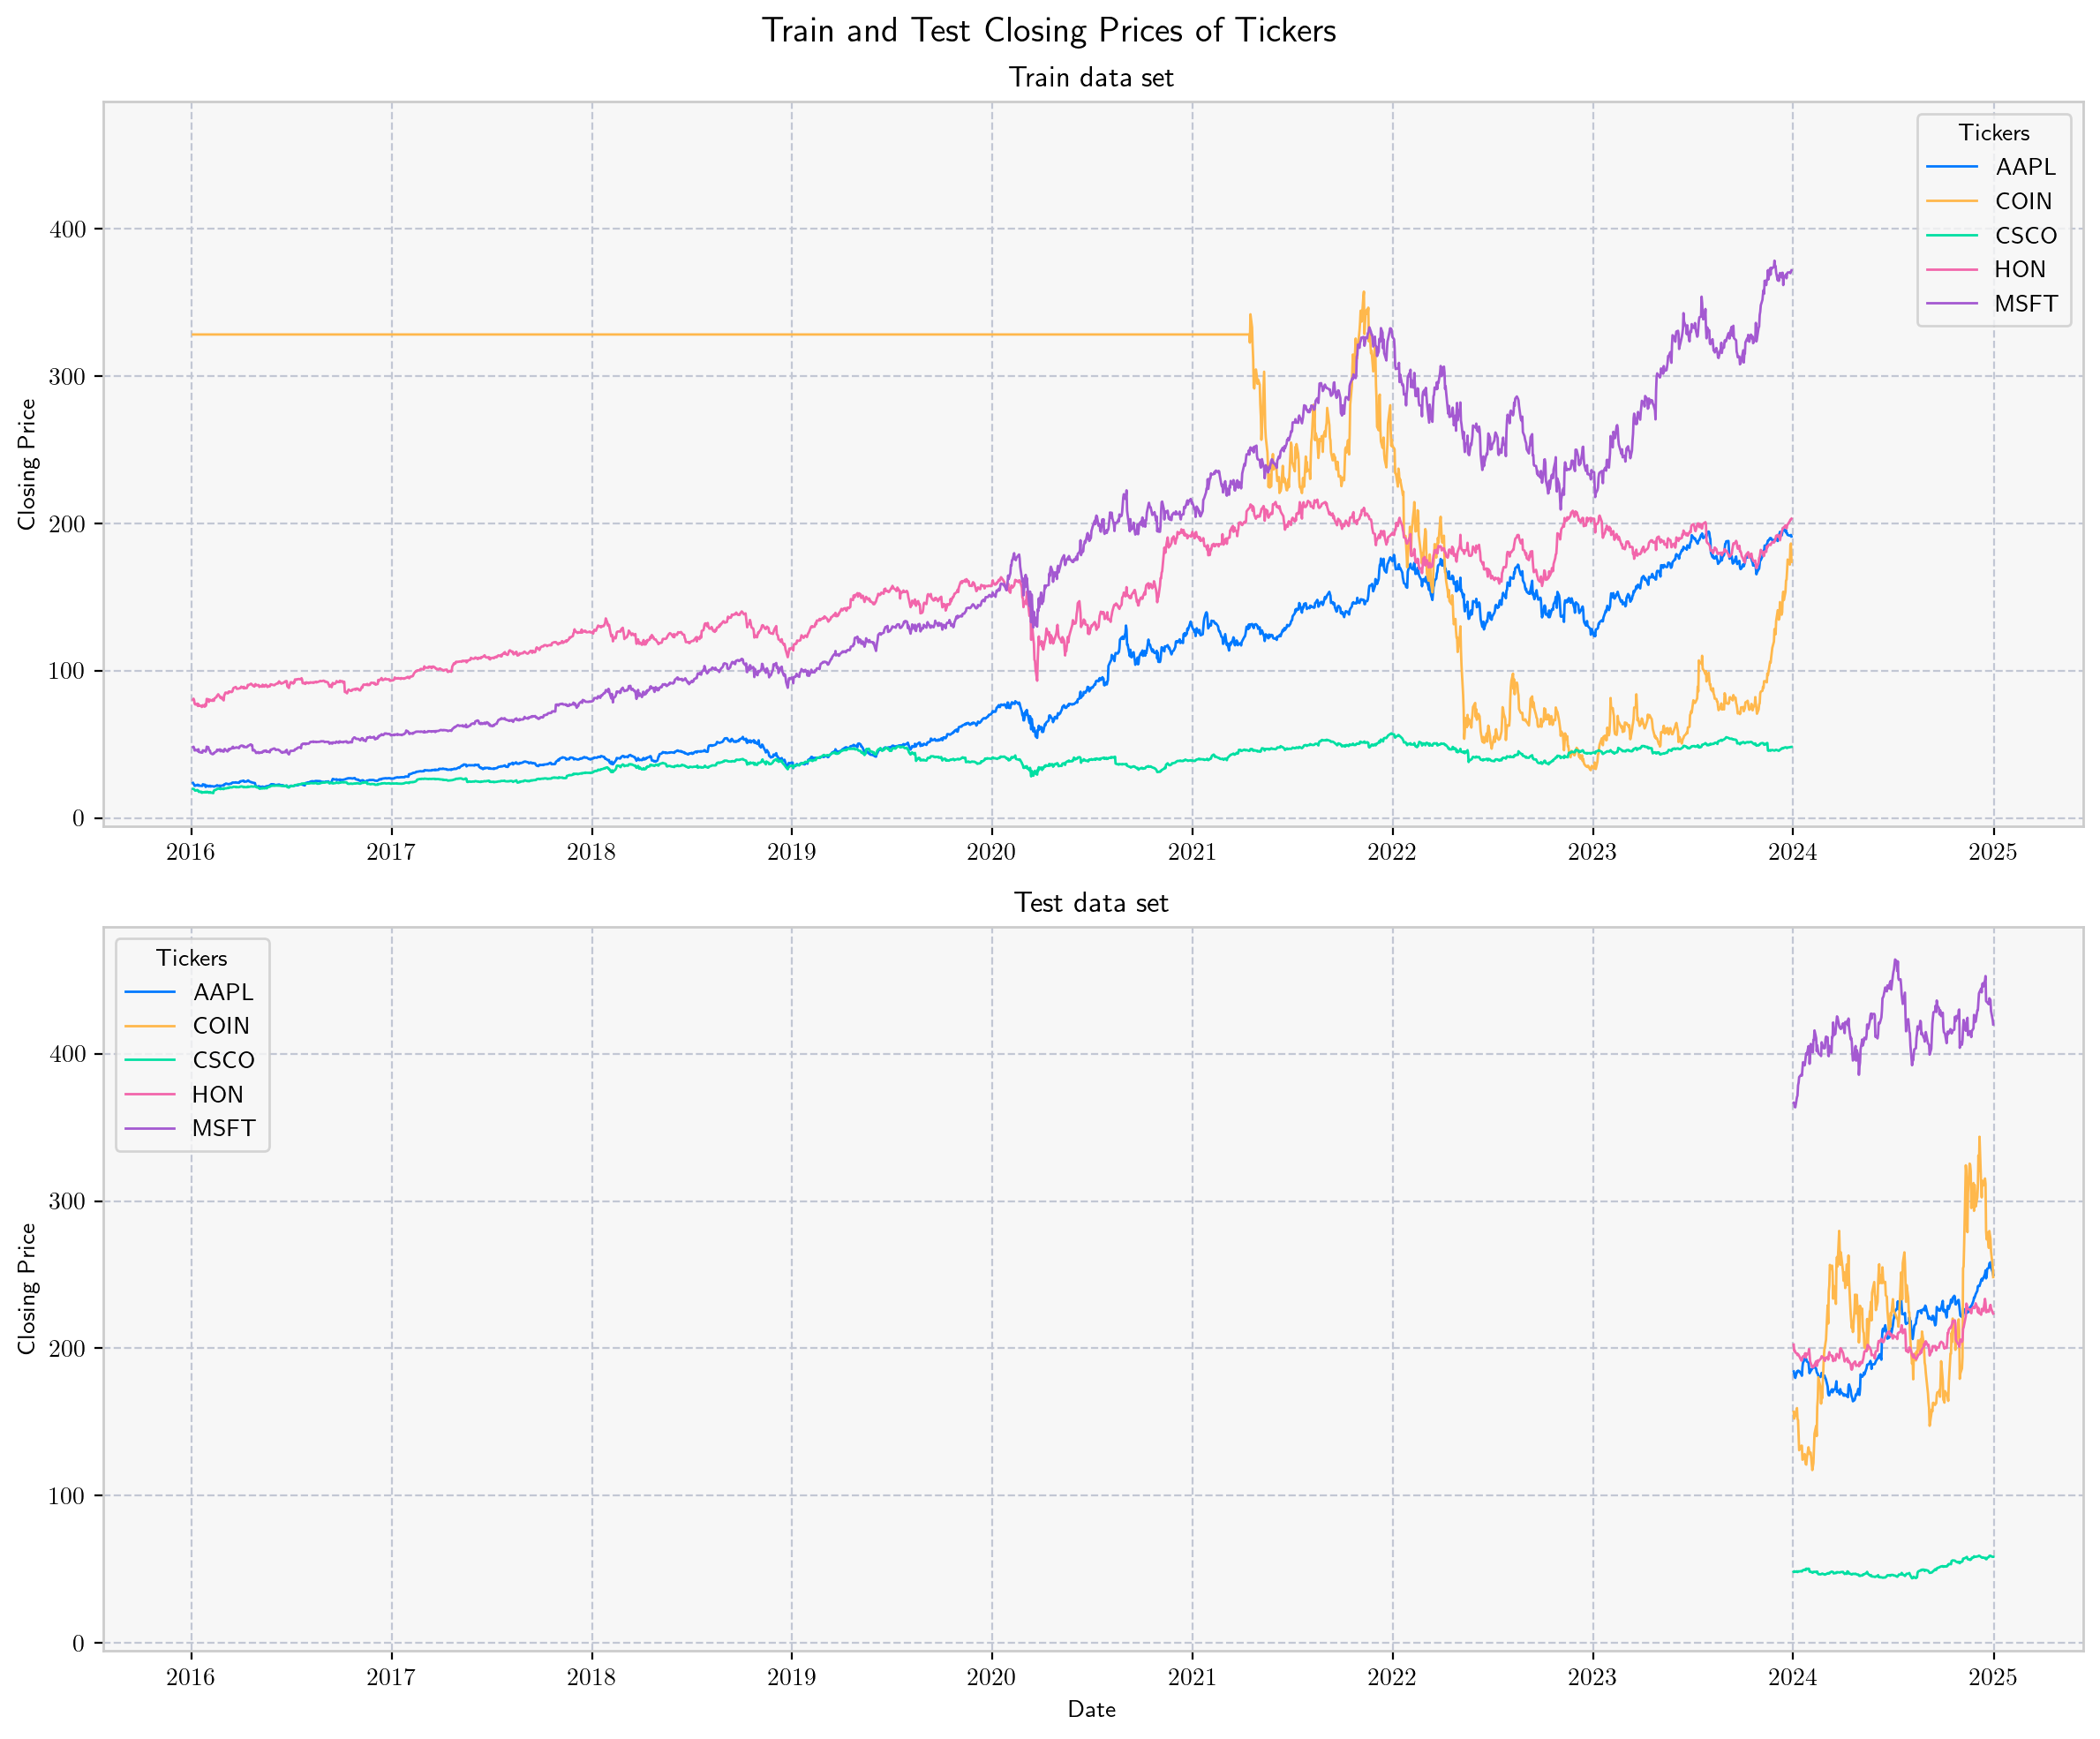

In [5]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_train_test_close_prices(
    train_data, trade_data, "../" + config.PLOT_DIR, config.TEST_NAME
)

In [6]:
environment = FinRLTradingEnv(
    train_data, trade_data, list(config_indicators.TECHNICAL_INDICATORS.keys())
)

Environment successfully created with 
	Stock dimension: 5 
	State space: 91


In [7]:
env_train = environment.get_train_env()

In [8]:
agent = FinRLAgent(env_train)

In [ ]:
trained_a2c = agent.train_model("a2c", logger_dir="../" + config.RESULTS_DIR)

In [9]:
agent.save_model("../" + config.MODELS_DIR, config.TEST_NAME + "_a2c")

In [10]:
trained_a2c = agent.load_model(
    "a2c", "../" + config.MODELS_DIR, config.TEST_NAME + "_a2c"
)

In [9]:
model_visualiser = ModelVisualiser()

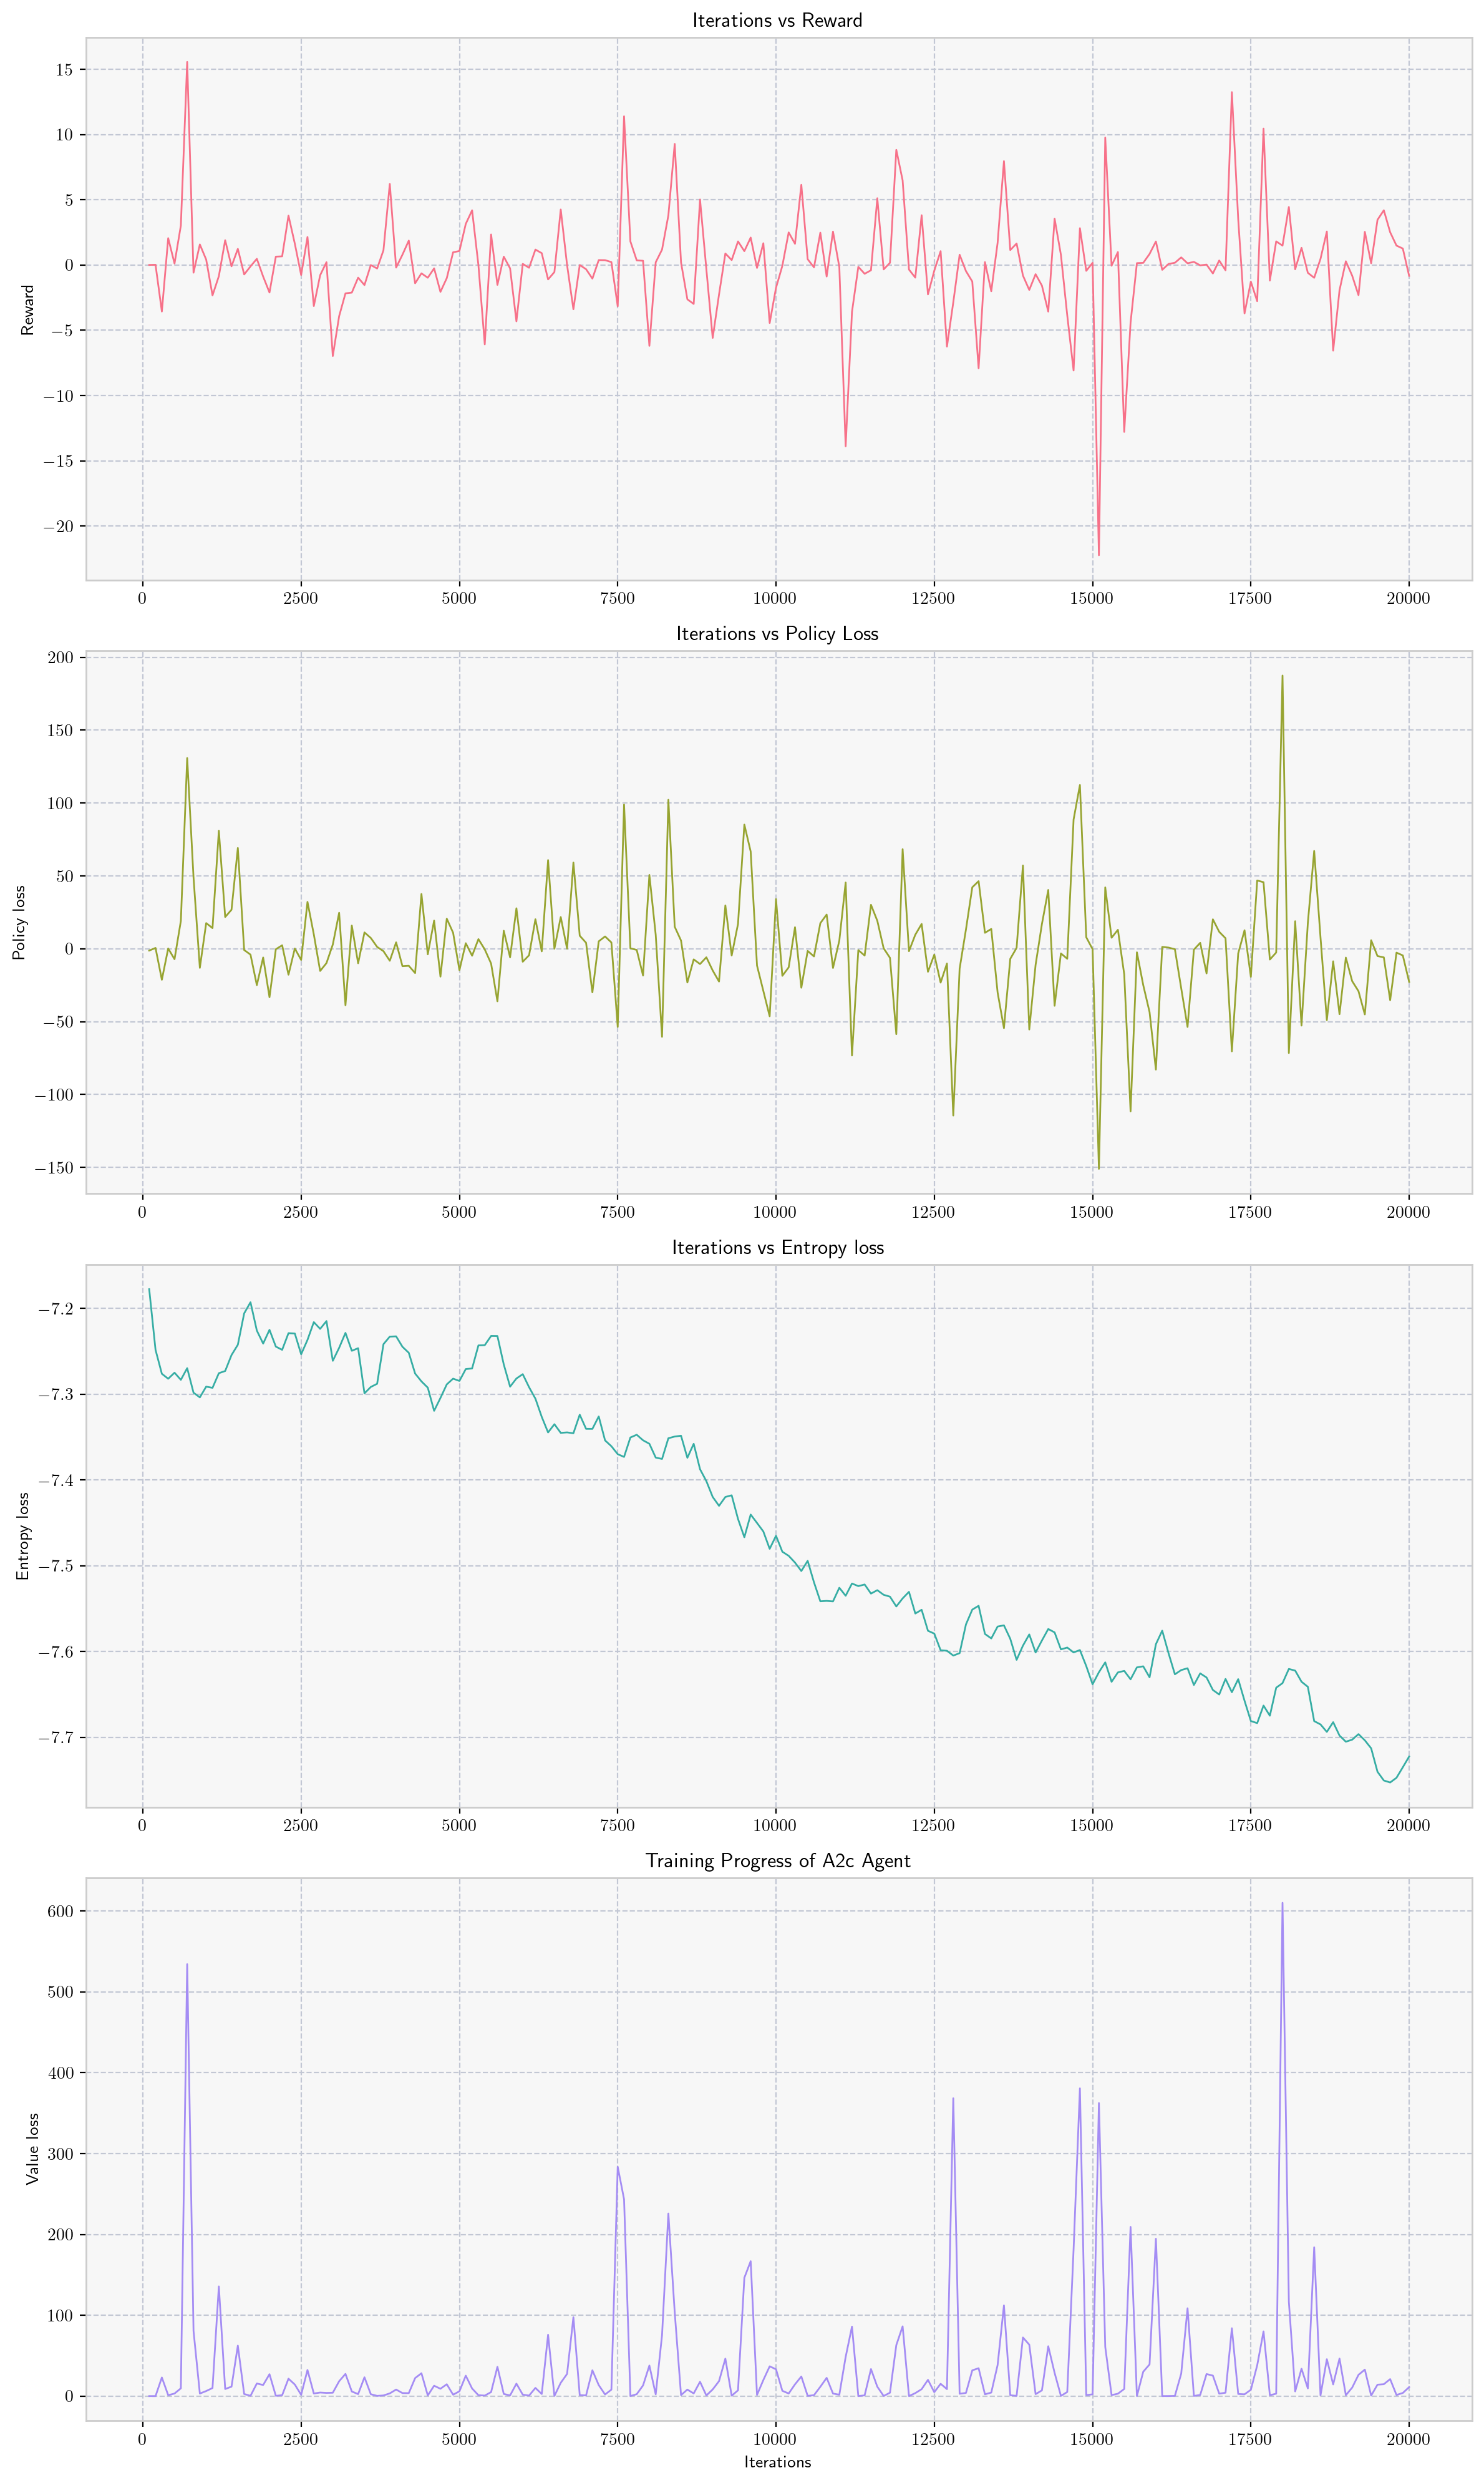

In [11]:
x = "time/iterations"
y = [
    "train/reward",
    "train/policy_loss",
    "train/entropy_loss",
    "train/value_loss",
]
title = [
    "Iterations vs Reward",
    "Iterations vs Policy Loss",
    "Iterations vs Entropy loss",
    "Iterations vs Value loss",
]
model_visualiser.evaluate_training(
    "a2c",
    x=x,
    y=y,
    title=title,
    directory="../" + config.PLOT_DIR,
    filename=config.TEST_NAME,
)

In [12]:
gym_env, (env_trade, obs_trade) = environment.get_trade_env()

In [13]:
df_account, df_actions = agent.test_model(
    gym_env,
)

hit end!


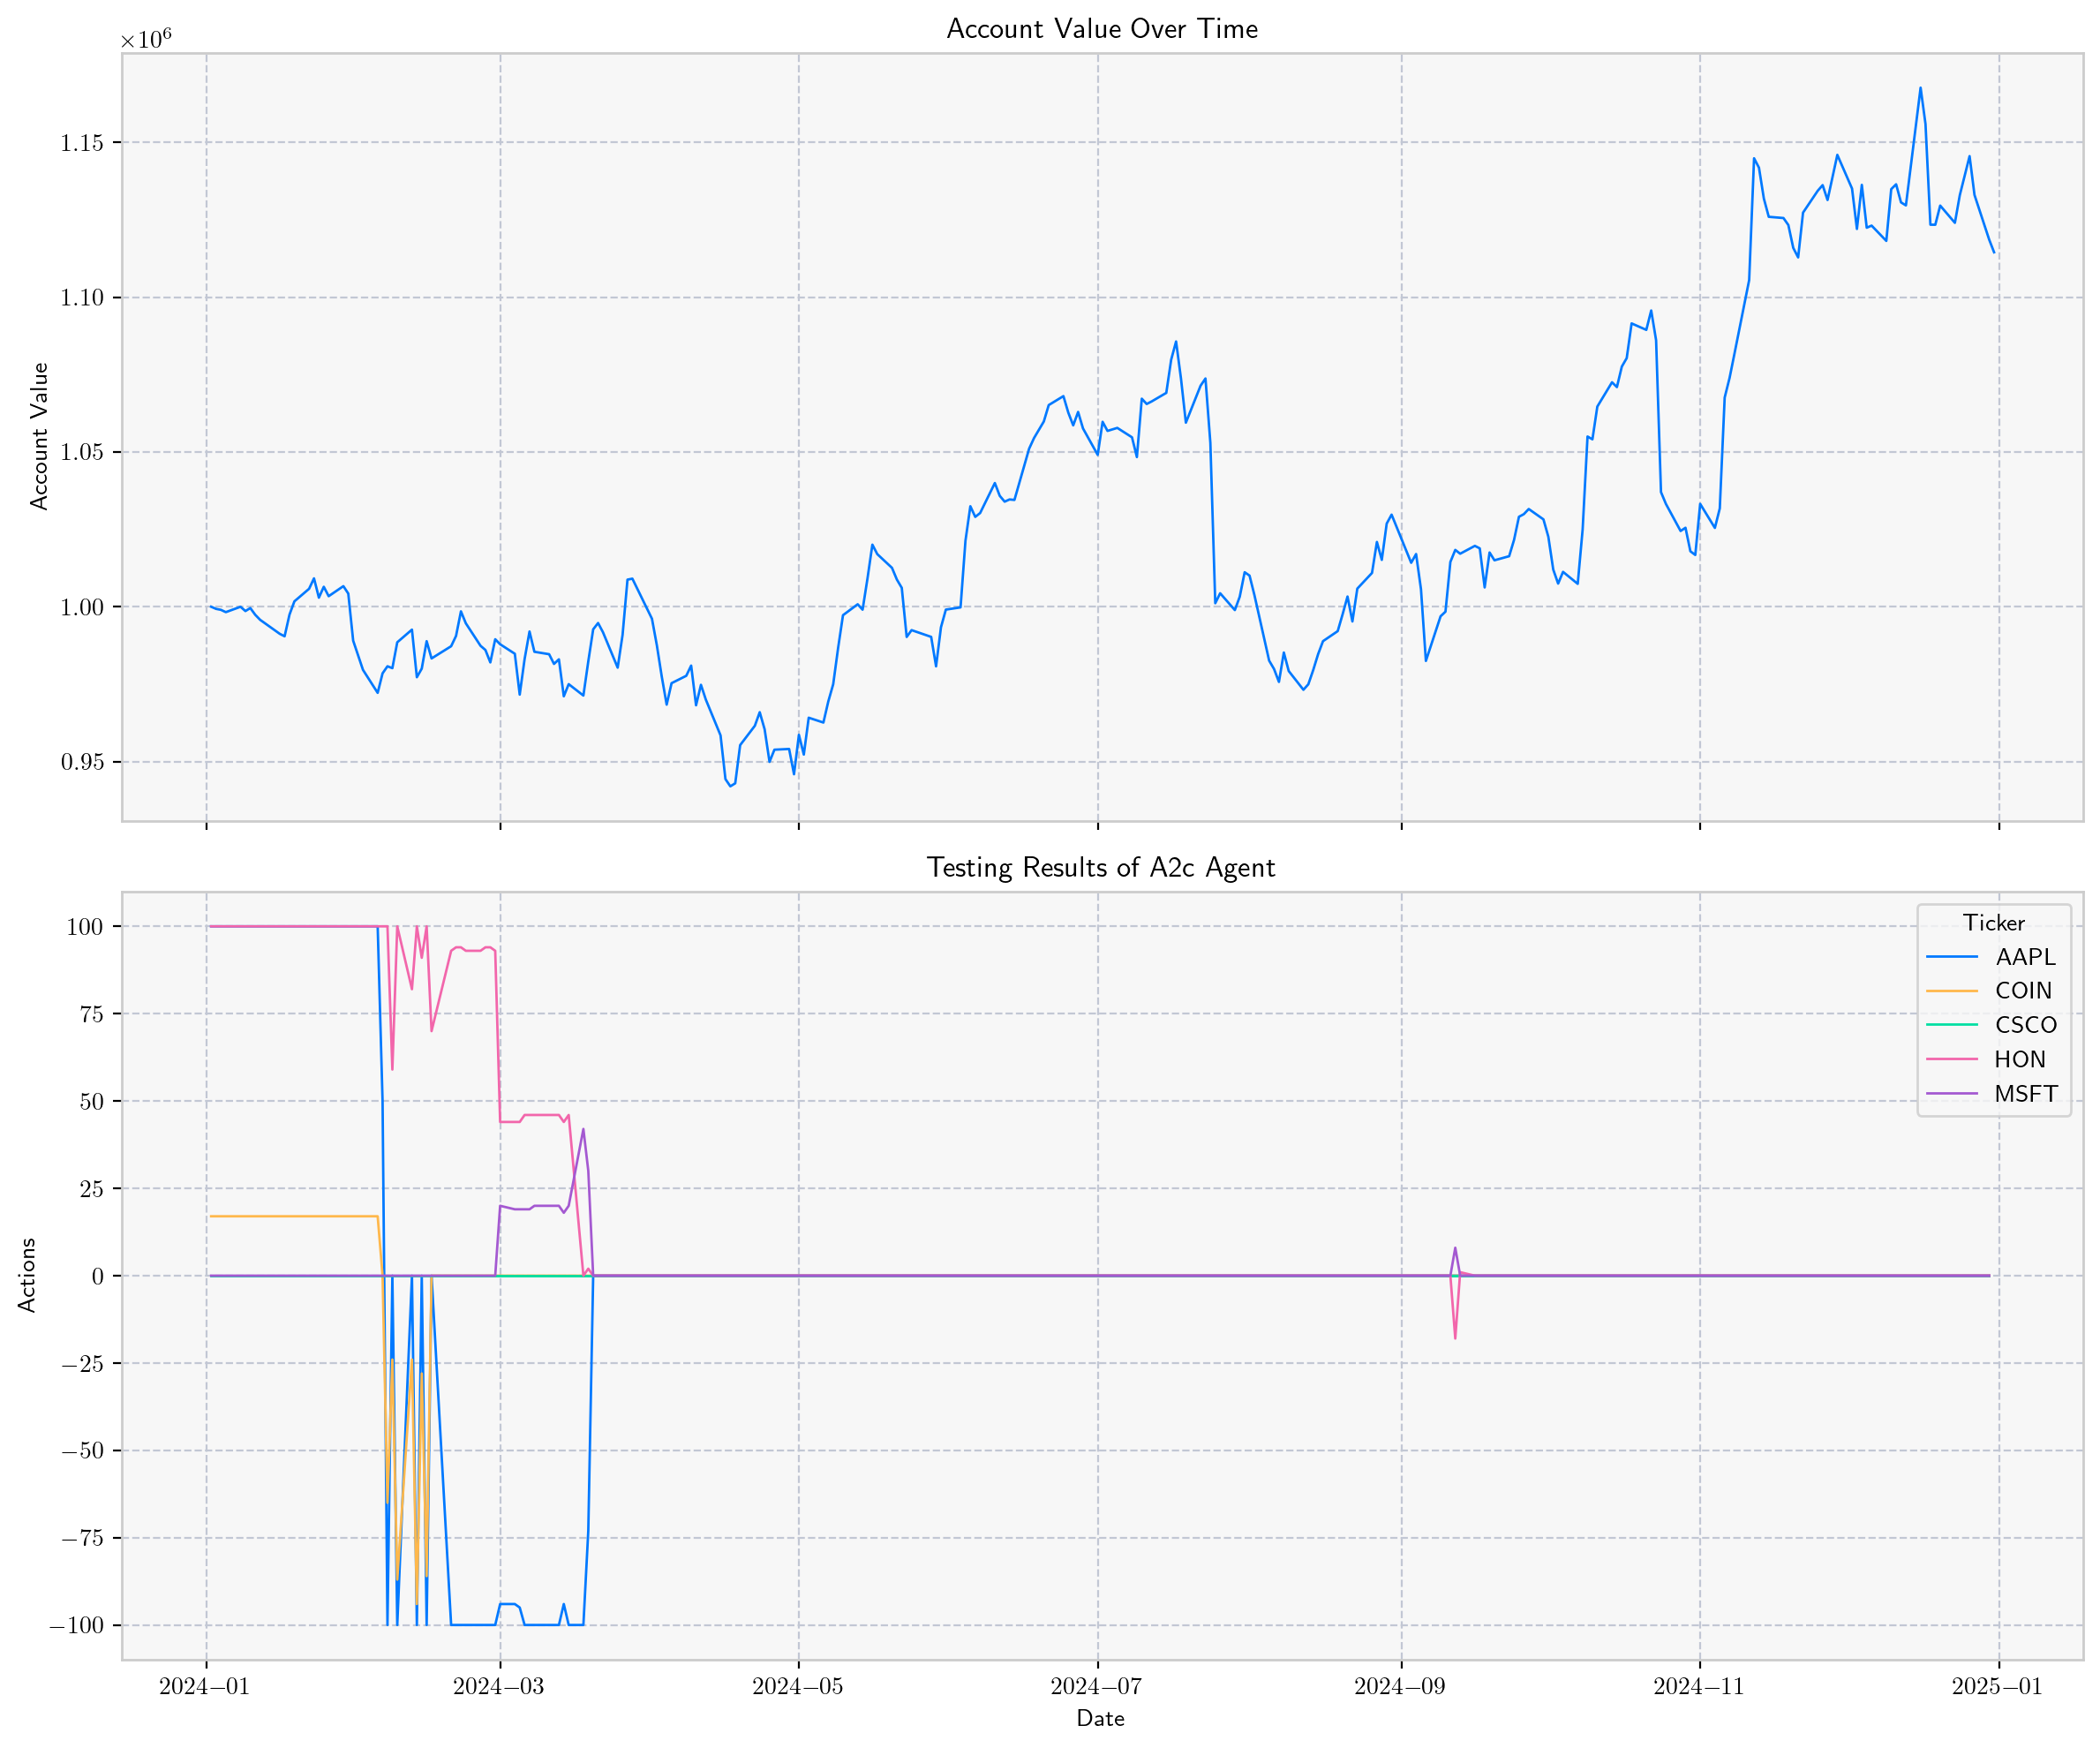

In [14]:
model_visualiser.evaluate_testing(
    "a2c", df_account, df_actions, "../" + config.PLOT_DIR, config.TEST_NAME
)